In [1]:
"""
!pip install Augmentor
!pip install pillow
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install keras
!unzip ./python/images_background.zip
!unzip ./python/images_background_small1.zip
!unzip ./python/images_background_small2.zip
!unzip ./python/images_evaluation.zip
"""

'\n!pip install Augmentor\n!pip install pillow\n!pip install pandas\n!pip install matplotlib\n!pip install numpy\n!pip install keras\n!unzip ./python/images_background.zip\n!unzip ./python/images_background_small1.zip\n!unzip ./python/images_background_small2.zip\n!unzip ./python/images_evaluation.zip\n'

In [2]:
import matplotlib.pyplot as plt
from load_data import load_directory, train_gen, val_gen, quiz
from build_models import make_convnet, make_capsnet, train_model, plot_history

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
batch_size = 20
directory = './images_evaluation/Angelic/'
train, test, labels = load_directory(directory)
tg = train_gen(train, labels, batch_size=batch_size, augmentation=True)
vg = val_gen(test, labels)

In [4]:
input_shape = (105, 105, 1)
n_class = len(labels)
routings = 3
reconstruction_loss = .392

In [5]:
convnet = make_convnet(input_shape, n_class, width=64)
convnet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 105, 105, 1)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 97, 97, 64)        5248      
_________________________________________________________________
conv2 (Conv2D)               (None, 93, 93, 128)       204928    
_________________________________________________________________
maxp1 (MaxPooling2D)         (None, 46, 46, 128)       0         
_________________________________________________________________
conv3 (Conv2D)               (None, 45, 45, 128)       65664     
_________________________________________________________________
conv4 (Conv2D)               (None, 44, 44, 256)       131328    
_________________________________________________________________
maxp2 (MaxPooling2D)         (None, 22, 22, 256)       0         
__________

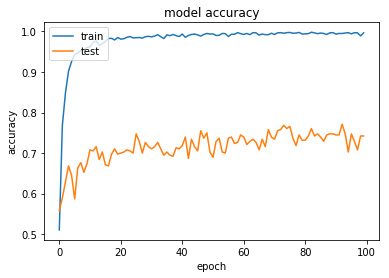

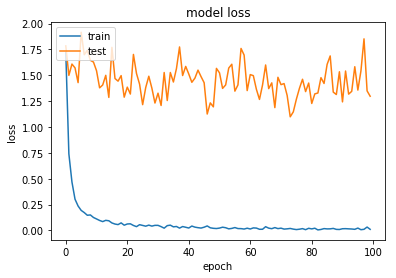

In [9]:
history = train_model(convnet, tg, vg, directory, verbose=True)
def plot_history(history, model_name='model'):
    """Takes a history object and makes some plots."""
    plt.plot(history.history['acc']);
    plt.plot(history.history['val_acc']);
    plt.title('{} accuracy'.format(model_name));
    plt.ylabel('accuracy');
    plt.xlabel('epoch');
    plt.legend(['train', 'test'], loc='upper left');
    plt.show();

    plt.plot(history.history['loss']);
    plt.plot(history.history['val_loss']);
    plt.title('{} loss'.format(model_name));
    plt.ylabel('loss');
    plt.xlabel('epoch');
    plt.legend(['train', 'test'], loc='upper left');
    plt.show();
    return
plot_history(history)

In [13]:
quiz(convnet, test, labels)

Quiz results: 282 out of 380 correct.
Quiz accuracy score: 0.742. Error rate: 0.258
Classification results: 306 out of 380 correct.
Classification accuracy score: 0.805. Error rate: 0.195


(282, 380, 306, 380)

In [14]:
capsnet, eval_model, manipulate_model = make_capsnet(input_shape, n_class, routings, reconstruction_loss)

Instructions for updating:
dim is deprecated, use axis instead


In [ ]:
def caps_tg(gen=tg):
    while True:
        X, Y = next(gen)
        yield ([X, Y], [Y, X])

ctg = caps_tg(tg)

def caps_vg(gen=vg):
    while True:1
        X, Y = next(gen)
        yield ([X, Y], [Y, X])

cvg = caps_vg(vg)

history = capsnet.fit_generator(
    ctg,
    epochs=10,
    steps_per_epoch=10,
    validation_data=cvg,
    validation_steps=len(test)//batch_size
)

Epoch 1/10
10/10 [==============================] - 202s 20s/step - loss: 1.4164 - capsnet_loss: 1.3187 - decoder_loss: 0.2492 - capsnet_acc: 0.0500 - val_loss: 0.7791 - val_capsnet_loss: 0.6819 - val_decoder_loss: 0.2480 - val_capsnet_acc: 0.0500
Epoch 2/10
10/10 [==============================] - 198s 20s/step - loss: 0.7582 - capsnet_loss: 0.6617 - decoder_loss: 0.2462 - capsnet_acc: 0.0950 - val_loss: 0.7061 - val_capsnet_loss: 0.6112 - val_decoder_loss: 0.2421 - val_capsnet_acc: 0.0526
Epoch 3/10
10/10 [==============================] - 205s 20s/step - loss: 0.6995 - capsnet_loss: 0.6095 - decoder_loss: 0.2296 - capsnet_acc: 0.0550 - val_loss: 0.7810 - val_capsnet_loss: 0.7026 - val_decoder_loss: 0.2000 - val_capsnet_acc: 0.0500
Epoch 4/10
 9/10 [==========================>...] - ETA: 1s - loss: 0.6883 - capsnet_loss: 0.6276 - decoder_loss: 0.1549 - capsnet_acc: 0.0611